# Logistic Regression 

In logistic regression the dependent variable has to be categorical in nature.

In [1]:
# analysis with financial analytics

In [2]:
# required libraries 

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
color=sns.color_palette()
import warnings
warnings.filterwarnings('ignore')     # warnings pacakage to ignore all warnings 

In [3]:
Default=pd.read_csv('Default.csv')

In [4]:
Default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [5]:
Default=Default[['default','student','balance','income']]


In [6]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [7]:
Default.shape

(10000, 4)

In [8]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


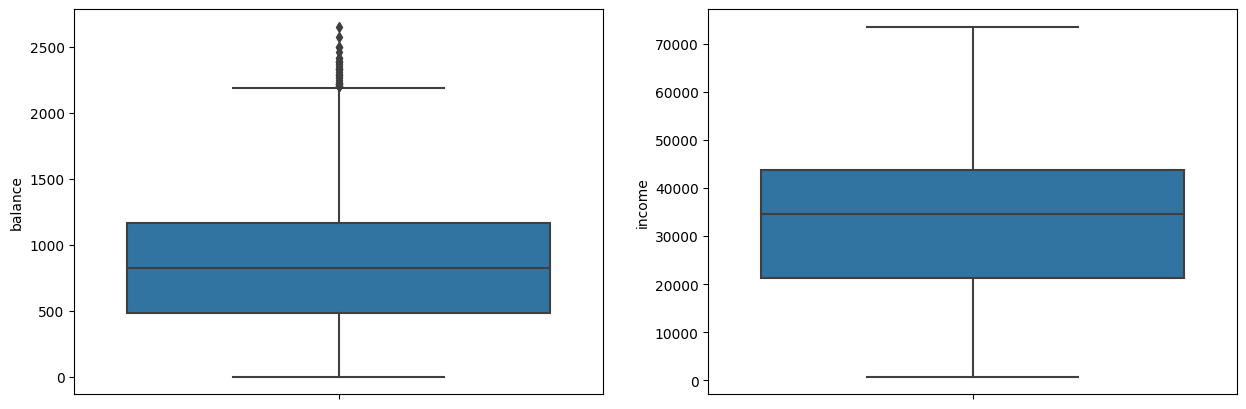

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=Default['balance'])  # 5no of summary through boxplot

plt.subplot(1,2,2)
sns.boxplot(y=Default['income'])
plt.show()

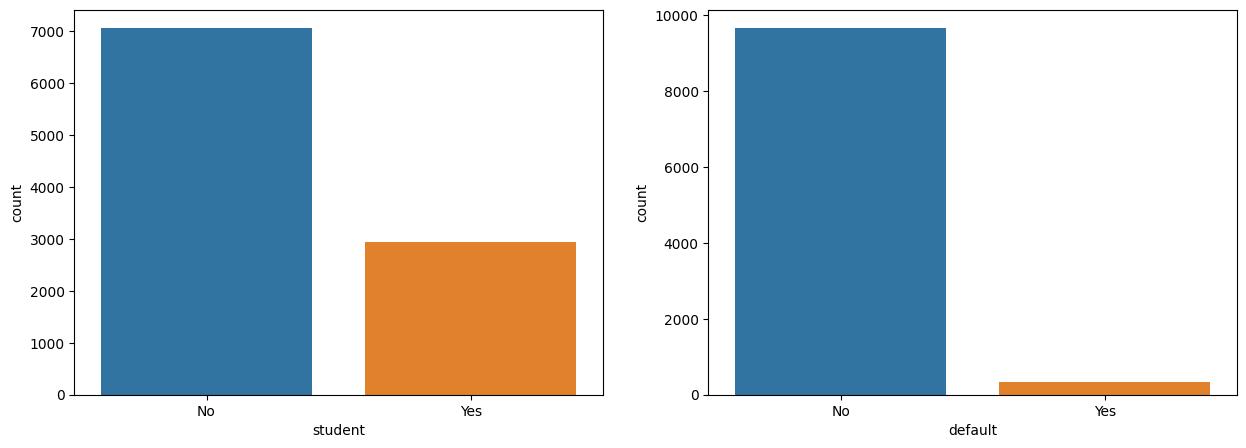

In [17]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(x=Default['student'])   # countplot for categorical columns to count the bins and observation

plt.subplot(1,2,2)
sns.countplot(x=Default['default'])
plt.show()

In [18]:
Default['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [19]:
Default['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [20]:
# if we want % vales than set normalize=True

Default['student'].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [21]:
Default['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

This is univariate analysis - is simplest form of statistic anlaysis , only use one variable is involved

# Bivariate analysis-

is one of the simplest forms of quantitative analysis , involved two variables for purpose of determining the empirical relationship b/w them

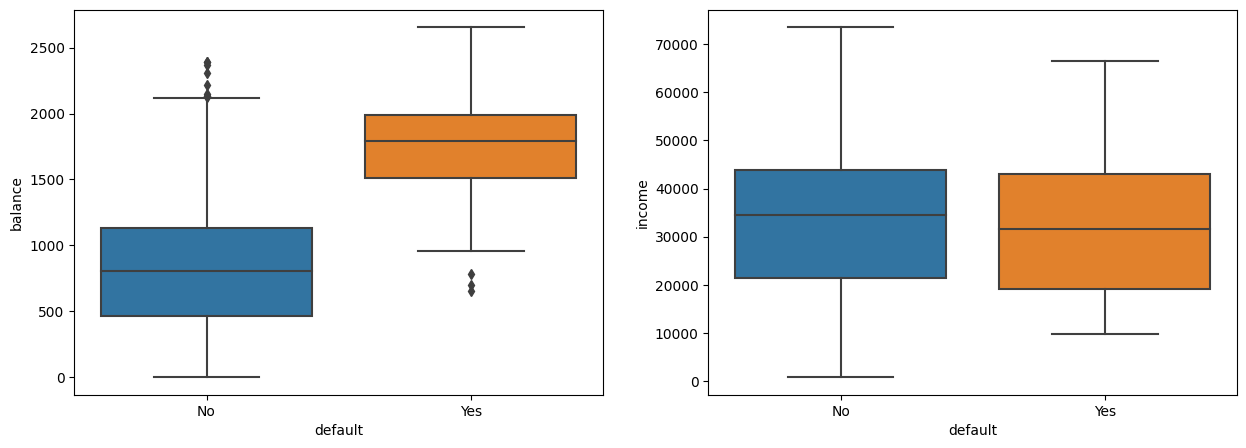

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=Default['default'],y=Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(x=Default['default'],y=Default['income'])
plt.show()

In [33]:
# crosstab()function is used to compute a simple cross tabulation of two factors (or more)

In [34]:
pd.crosstab(Default['student'],Default['default'],normalize='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


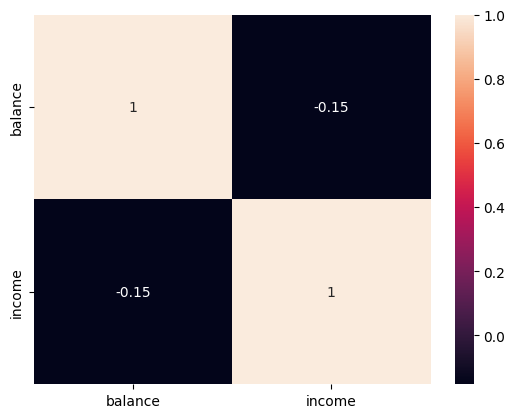

In [35]:
sns.heatmap(Default[['balance','income']].corr(), annot=True)
plt.show()

In [36]:
Default.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [37]:
# whenever we want to build over model , we must remove the outliers first 

In [38]:
Q1, Q3= Default['balance'].quantile([.25,.75])

In [41]:
IQR= Q3-Q1
LL= Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)

In [42]:
UL

2193.174308607817

after this 2193.71 range , all are outliers 

In [44]:
df=Default[Default['balance']>UL]              # outliers
df

,default,student,balance,income
173,Yes,Yes,2205.799521,14271.492253
1136,Yes,No,2499.016750,51504.293960
1160,Yes,Yes,2502.684931,14947.519752
1359,Yes,No,2220.966201,40725.096207
1502,Yes,Yes,2332.878254,11770.234124
1609,Yes,Yes,2269.946966,18021.105948
2096,Yes,Yes,2261.848162,20030.165119
2140,No,Yes,2308.893236,19110.266412
2929,Yes,Yes,2387.314867,28296.914718
3162,Yes,Yes,2415.316994,17429.503375


In [45]:
df['default'].count()

31

means 31 outliers in our dataset

In [46]:
df['default'].value_counts(normalize=True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

 In outliers default % is higher (83%) 

In [48]:
df['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [49]:
# note : Directly we do not remove the outliers record so we do maximize the data = UL

In [50]:
Default['balance']=np.where(Default['balance']>UL,UL,Default['balance'])

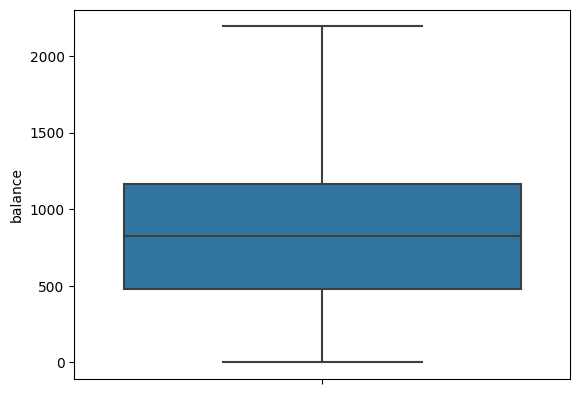

In [51]:
sns.boxplot(y=Default['balance'])
plt.show()

we balanced all our outliers

In [53]:
# now we convert categorical values into numerical value by using pandas.get_dummies

In [54]:
Default=pd.get_dummies(Default,drop_first=True)

In [55]:
Default.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [56]:
Default.columns

Index(['balance', 'income', 'default_Yes', 'student_Yes'], dtype='object')

In [57]:
#rename 
Default.columns=['balance','income','default','student']

In [58]:
Default.head()

,balance,income,default,student
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [59]:
# now using sklearn model

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X=Default.drop('default',axis=1)
Y=Default['default']

In [63]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.3,random_state=21 ,stratify=Y)

The random state hyperparameter in the train_test_split() function controls the shuffling process. With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. With random_state=0 , we get the same train and test sets across different executions.

In [64]:
print(X_train.shape)

(7000, 3)


In [66]:
print(X_test.shape)

(3000, 3)


In [68]:
print(Y_train.value_counts(normalize=True).round(3))

0    0.967
1    0.033
Name: default, dtype: float64


In [69]:
print(Y_test.value_counts(normalize=True).round(3))

0    0.967
1    0.033
Name: default, dtype: float64


In [70]:
# defaulter ration is equal in testing and trainingset

Note : In under sampling we are basically losing out on the important information, and we tackle that by using oversampling .

In oversampling we kind of increase the number of sample minority class to match up to the number of samples in the majority class.

The various method to acheived -

1. random over sampling 

2.SMOTE - synthetic minority over sampling technique
(where you create artificial samples of your minority class)

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
sm=SMOTE(random_state=33,sampling_strategy=0.75)

In [79]:
X_res,Y_res= sm.fit_resample(X_train,Y_train)            # resample

In [84]:
# now apply logistic regression in over model
from sklearn.linear_model import LogisticRegression

In [85]:
lr=LogisticRegression()

In [86]:
lr.fit(X_res,Y_res)

LogisticRegression()

In [87]:
y_pred=lr.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix, classification_report

In [89]:
confusion_matrix(Y_test,y_pred)

array([[2589,  311],
       [  25,   75]], dtype=int64)

In [90]:
(2589+75)/(2589+75+25+311)

0.888

Accuracy